# Root Zone Soil Moisture

## Learning Objectives
In this tutorial, we will create a visualization of root zone soil moisture (RZSM) for Nov 19, 2022 and April 6, 2023, when an atmospheric river brought rain to the coastal and the Central Valley regions. The heavy rainfall and snow helped to replenish ground water in California, which had been in a drought for the past three years.

## Dataset

The Soil Moisture Active Passive (SMAP) L4 Global 3-hourly 9 km EASE-Grid Surface and Root Zone Soil Moisture Analysis Update provides a model-derived global estimates of root zone soil moisture of the top 100 cm of the soil column in m3/m3 posted on a 9 km EASE-Grid 2.0. Root zone soil moisture estimates are obtained by merging SMAP observations with estimates from a land surface model in a soil moisture ensemble Kalman data assimilation system. 

The dataset and algorithm is described in the [data user guide](https://nsidc.org/sites/default/files/documents/user-guide/multi_spl4smau-v007-userguide.pdf) and the [Product Specific Document](https://nsidc.org/sites/default/files/documents/technical-reference/reichle1438.pdf). 

Please cite the dataset as following:
> Reichle, R., G. De Lannoy, R. D. Koster, W. T. Crow, J. S. Kimball, Q. Liu, and M. Bechtold. (2022). SMAP L4 Global 3-hourly 9 km EASE-Grid Surface and Root Zone Soil Moisture Analysis Update, Version 7. Boulder, Colorado USA. NASA National Snow and Ice Data Center Distributed Active Archive Center. https://doi.org/10.5067/LWJ6TF5SZRG3.

## Requirements
1. **Compute environment**: This notebook can only be run in an AWS Cloud instance running in the `us-west-2` region.
2. **Earthdata Login**. An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up.
3. **Additional Requirements**: This tutorial requires the following Python modules installed in your system: earthaccess. To install the necessary Python modules, you can run:
```bash
pip install -r earthaccess 
```

In [1]:
import earthaccess
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.crs import Projection
import matplotlib.pyplot as plt

### 1. Authentication
Access to NASA OPeNDAP requires NASA Earthdata authentication. We recommend authenticating your [Earthdata Login (EDL)](https://urs.earthdata.nasa.gov/) information using the earthaccess python library as follows:

In [2]:
auth = earthaccess.login(strategy="netrc") # works if the EDL login already been persisted to a netrc
if not auth.authenticated:
    # ask for EDL credentials and persist them in a .netrc file
    auth = earthaccess.login(strategy="interactive", persist=True)

You're now authenticated with NASA Earthdata Login
Using token with expiration date: 10/28/2023
Using .netrc file for EDL


### 2. Search
We will use `earthaccess` module for search for dataset granules from Novemember 19, 2022 and April 6, 2023.

In [3]:
# SMAP SPL4SMGP
doi = '10.5067/LWJ6TF5SZRG3'

# search granules from Nov 19, 2022
date1 = "2022-11-19"
granules1 = earthaccess.search_data(
    count=-1, # needed to retrieve all granules
    doi=doi,
    temporal=(date1, date1)
)

# search granules from Apr 06, 2023
date2 = "2023-04-06"
granules2 = earthaccess.search_data(
    count=-1, # needed to retrieve all granules
    doi=doi,
    temporal=(date2, date2)
)

Granules found: 1
Granules found: 1


### 3. Open granule
Let's open the granule into a xarray. The `earthaccess` module manages authentication that is needed for accessing data.

In [5]:
# granules from Nov 19, 2022
fh1 = earthaccess.open(granules1)
# open geophysical_data group
ds1 = xr.open_dataset(fh1[0], phony_dims='access', group='Analysis_Data')
# get location
ds_loc1 = xr.open_dataset(fh1[0], phony_dims='access')

# granules from Apr 06, 2023
fh2 = earthaccess.open(granules2)
# open geophysical_data group
ds2 = xr.open_dataset(fh2[0], phony_dims='access', group='Analysis_Data')
# get location
ds_loc2 = xr.open_dataset(fh2[0], phony_dims='access')

 Opening 1 granules, approx size: 0.09 GB


QUEUEING TASKS | : 0it [00:00, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

 Opening 1 granules, approx size: 0.09 GB


QUEUEING TASKS | : 0it [00:00, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

The "sm_rootzone_analysis" variable is within the "Analysis_Data" group provide root zone soil moisture (0-100 cm). Let's print the attributes of the `sm_rootzone_analysis` variables.

In [6]:
ds1.variables['sm_rootzone_analysis'].attrs

{'DIMENSION_LABELS': [b'y', b'x'],
 'coordinates': '/cell_lat /cell_lon',
 'fmissing_value': -9999.0,
 'grid_mapping': 'EASE2_global_projection',
 'long_name': 'Analysis root zone soil moisture (0-100 cm)',
 'units': 'm3 m-3',
 'valid_max': 0.9,
 'valid_min': 0.0}

### 5. Plot
A drastic increase in the root zone soil moisture will be evident when comparing Nov. 19 2022 and Apr. 6, 2023.

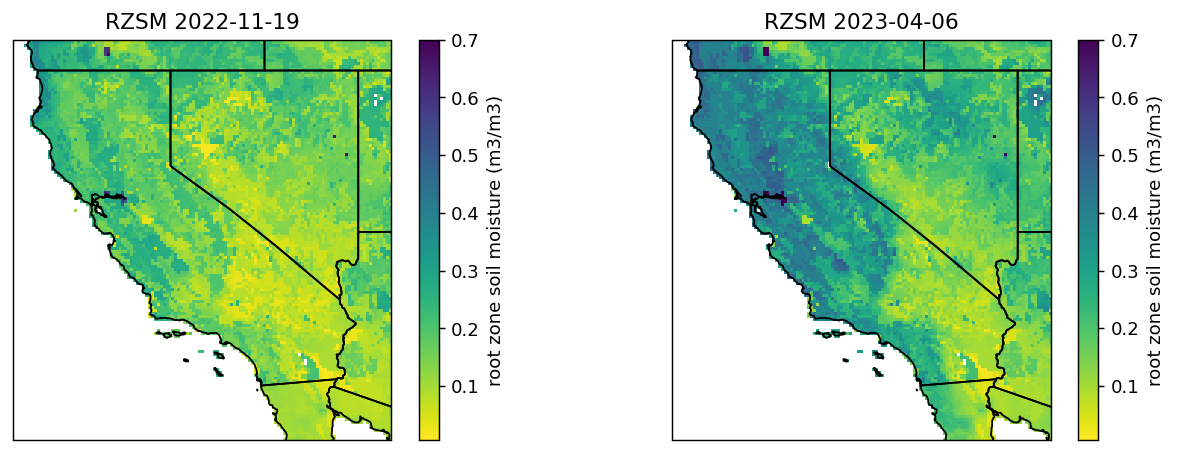

In [8]:
# create the plot
proj = Projection("EPSG:6933") # EASEGRID 2
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi=130, facecolor="w", subplot_kw=dict(projection=proj))

ca_bounds = [-12060785, -10902950, 3769089, 4995383]

snowax1 = ax1.pcolormesh(ds_loc1.x, ds_loc1.y, ds1.sm_rootzone_analysis, vmax=0.7, cmap='viridis_r')
plt.colorbar(snowax1, ax=ax1, label="root zone soil moisture (m3/m3)")
ax1.add_feature(cfeature.STATES)
ax1.set_extent(ca_bounds, crs=proj)
ax1.set_title(f'RZSM {date1}')

snowax2 = ax2.pcolormesh(ds_loc2.x, ds_loc2.y, ds2.sm_rootzone_analysis, vmax=0.7, cmap='viridis_r')
plt.colorbar(snowax2, ax=ax2, label="root zone soil moisture (m3/m3)")
ax2.add_feature(cfeature.STATES)
ax2.set_extent(ca_bounds, crs=proj)
ax2.set_title(f'RZSM {date2}')
plt.show()